In [1]:
import pyfits as pf
import numpy as np

In [2]:
imname = 'spec.fits'

In [3]:
hdulist = pf.open(imname)

In [4]:
hdulist.info()

Filename: spec.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     143   (2542,)      float32   


In [5]:
pridata = hdulist[0].data #flux  -- wavelength is described in the header

In [6]:
pridata

array([ 0.99421591,  0.99000108,  0.98497832, ...,  0.99758834,
        0.99674183,  0.99806845], dtype=float32)

In [7]:
np.shape(pridata)

(2542,)

In [8]:
priheader = hdulist[0].header

In [9]:
priheader

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                 2542 / Axis length                                    
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2015-01-20T15:38:21' / Date FITS file was generated                  
IRAF-TLM= '2015-01-20T15:38:21' / Time of last modification                     
OBJECT  = 'HR5056  '           / Name of the object observed                    
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HEAD    = '        '           / Head Model                                     
ACQMODE = 'Single  '        

In [10]:
spechdr = pf.getheader(imname)

In [11]:
spechdr

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                 2542 / Axis length                                    
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2015-01-20T15:38:21' / Date FITS file was generated                  
IRAF-TLM= '2015-01-20T15:38:21' / Time of last modification                     
OBJECT  = 'HR5056  '           / Name of the object observed                    
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HEAD    = '        '           / Head Model                                     
ACQMODE = 'Single  '        

In [12]:
print (spechdr.cards[:10])

('SIMPLE', True, 'Fits standard')
('BITPIX', -32, 'Bits per pixel')
('NAXIS', 1, 'Number of axes')
('NAXIS1', 2542, 'Axis length')
('EXTEND', True, 'File may contain extensions')
('ORIGIN', 'NOAO-IRAF FITS Image Kernel July 2003', 'FITS file originator')
('DATE', '2015-01-20T15:38:21', 'Date FITS file was generated')
('IRAF-TLM', '2015-01-20T15:38:21', 'Time of last modification')
('OBJECT', 'HR5056', 'Name of the object observed')
('COMMENT', "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", '')


In [13]:
print (spechdr.keys())

['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'EXTEND', 'ORIGIN', 'DATE', 'IRAF-TLM', 'OBJECT', 'COMMENT', 'COMMENT', 'HEAD', 'ACQMODE', 'READMODE', 'IMGRECT', 'HBIN', 'VBIN', 'SUBRECT', 'XTYPE', 'XUNIT', 'TRIGGER', 'CALIB', 'DLLVER', 'EXPOSURE', 'TEMP', 'READTIME', 'OPERATN', 'GAIN', 'EMREALGN', 'VCLKAMP', 'VSHIFT', 'PREAMP', 'SERNO', 'UNSTTEMP', 'BLCLAMP', 'PRECAN', 'FLIPX', 'FLIPY', 'CNTCVTMD', 'CNTCVT', 'DTNWLGTH', 'SNTVTY', 'SPSNFLTR', 'THRSHLD', 'PCNTENLD', 'NSETHSLD', 'PTNTHLD1', 'PTNTHLD2', 'PTNTHLD3', 'PTNTHLD4', 'AVGFTRMD', 'AVGFCTR', 'FRMCNT', 'USERTXT1', 'USERTXT2', 'USERTXT3', 'USERTXT4', 'FRAME', 'ESHTMODE', 'DETECTOR', 'EXPTIME', 'OUTPTAMP', 'CAMGAIN', 'DATE-OBS', 'RA', 'DEC', 'EPOCH', 'AIRMASS', 'JD', 'ST', 'HA', 'IMAGE', 'TELESCOP', 'PLATESCL', 'INSTRUME', 'OBSERVER', 'RDNOISE', 'FILTER', 'WCSDIM', 'LTM1_1', 'WAT0_001', 'WAT1_001', 'ZEROCOR', 'FLATCOR', 'CCDSEC', 'CCDMEAN', 'CCDMEANT', 'CCDPROC', 'CTYPE1', 'CDELT1', 'CD1_1', 'DCLOG1', 'APNUM1', 'DC-FLAG', 'CRVAL1', 'CRPIX1',

In [14]:
"CRVAL1" in spechdr.keys()

True

In [15]:
cdelt1 = spechdr['CDELT1'] #delta for the wavelength -- next value for the wavelength

In [16]:
cdelt1

0.0393545848091301

In [17]:
crval1 = spechdr['CRVAL1'] #first wavelength, where the spectrum starts

In [18]:
crval1

6513.0

In [19]:
specdata = pf.getdata(imname)

In [20]:
specdata

array([ 0.99421591,  0.99000108,  0.98497832, ...,  0.99758834,
        0.99674183,  0.99806845], dtype=float32)

In [21]:
naxis1 = len(specdata) #can be in the header, but may not be

In [22]:
naxis1

2542

In [23]:
lbarr = np.arange(naxis1)*cdelt1+crval1

In [24]:
import matplotlib.pyplot as plt

/home/mldantas/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [25]:
plt.plot(lbarr, specdata, 'o--', ms=2)

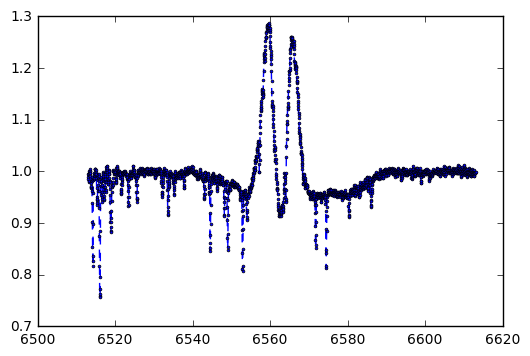

In [26]:
plt.show()

In [27]:
n, bins, patches = plt.hist(specdata)

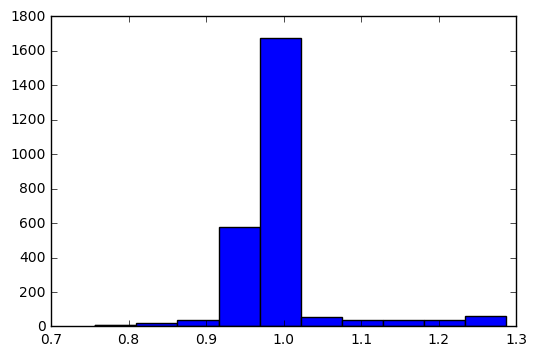

In [28]:
plt.show()

In [29]:
n

array([    6.,    20.,    37.,   576.,  1676.,    53.,    36.,    36.,
          40.,    62.])

In [30]:
pf.writeto('spec_modified01.fits', specdata, header=spechdr, clobber=True)

/home/mldantas/anaconda2/lib/python2.7/site-packages/pyfits/file.py:372: UserWarning: Overwriting existing file 'spec_modified01.fits'.
  warnings.warn("Overwriting existing file %r." % self.name)


In [31]:
f = pf.open('spec_modified01.fits', mode = 'update')
f.flush()

In [32]:
f.close()

In [33]:
image = 'hdust_rgb.fits'

In [34]:
fits_image = pf.open(image)

In [35]:
data_image = fits_image[0].data

In [36]:
np.shape(data_image)

(256, 256)

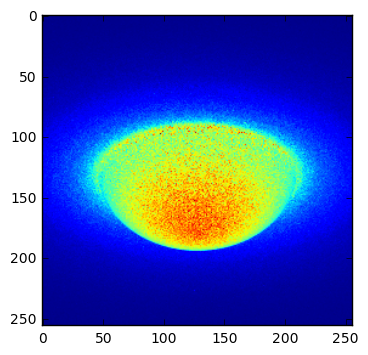

In [53]:
data = pf.getdata(image)

plt.imshow(data)
plt.show()

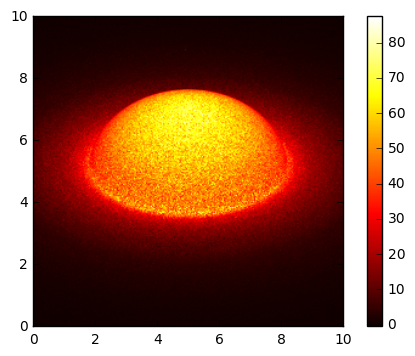

In [49]:
data = pf.getdata(image)

plt.imshow(data[::-1], extent=[0,10,0,10], cmap='hot')
plt.colorbar()
plt.show()

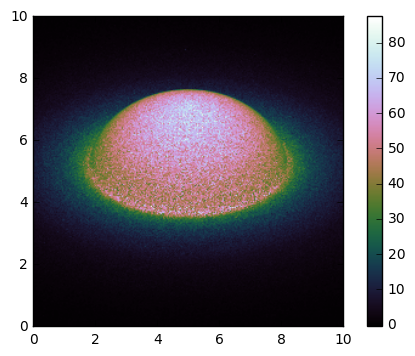

In [55]:
data = pf.getdata(image)

plt.imshow(data[::-1], extent=[0,10,0,10], cmap='cubehelix')
plt.colorbar()
plt.show()

In [65]:
from PIL import Image
img = Image.open('hdust_rgb.png')
img_ar = np.array(img)
np.shape(img_ar)


(256, 256, 3)

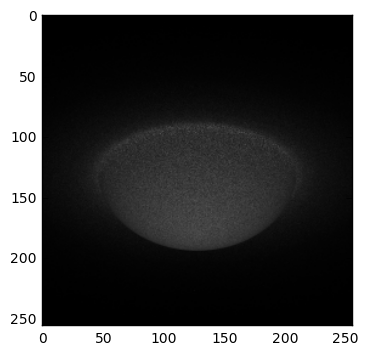

In [66]:
plt.imshow(img_ar[:,:,0], vmin=0, vmax=255, cmap="gray") #first layer: 'r' (red of rgb)
plt.show()

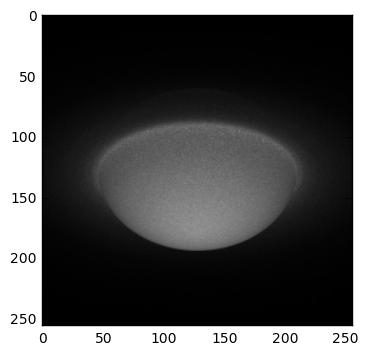

In [67]:
plt.imshow(img_ar[:,:,1], vmin=0, vmax=255, cmap="gray") #first layer: 'g' (green of rgb)
plt.show()

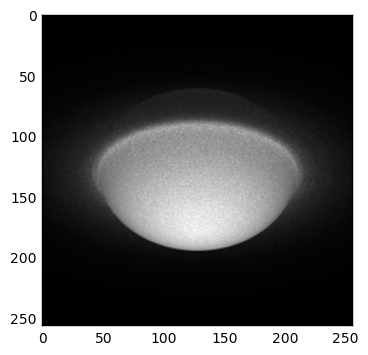

In [68]:
plt.imshow(img_ar[:,:,2], vmin=0, vmax=255, cmap="gray") #first layer: 'b' (blue of rgb)
plt.show()